# Hierarchical and K-means Clustering on Credit Cards

### Introduction

Here we would be analysing the Credit Cards data sourced from https://www.kaggle.com/arjunbhasin2013/ccdata
to carry out Hierarchical and K-means Clustering.

This notebook is an example of using clustering for customer segmentation to define a marketing strategy. This sample dataset that summarizes the usage behavior of about 9000 active credit card holders during the last 6 months.

It includes the following variables:

* CUST_ID: Identification of Credit Card holder
* BALANCE: Balance amount left in their account to make purchases
* BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1
* PURCHASES: Amount of purchases made from account
* ONEOFF_PURCHASES: Maximum purchase amount done in one-go
* INSTALLMENTS_PURCHASES: Amount of purchase done in installment
* CASH_ADVANCE: Cash in advance given by the user
* PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASES INSTALLMENTS FREQUENCY: How frequently purchases in installments are being done (1 =
* frequently done, 0 = not frequently done)
* CASHADVANCE_FREQUENCY: How frequently the cash in advance being paid
* CASHADVANCE_TRX: Number of Transactions made with "Cash in Advanced"
* PURCHASES_TRX: Number of purchase transactions made
* CREDIT_LIMIT: Limit of Credit Card for user
* PAYMENTS: Amount of Payment done by user
* MINIMUM_PAYMENTS: Minimum amount of payments made by user
* PRC_FULL_PAYMENT: Percent of full payment paid by user
* TENURE: Tenure of credit card service for user

In [113]:
# define used libraries
libraries_used <- 
  c("lazyeval", "readr","plyr" ,"dplyr", "readxl", "ggplot2", 
    "funModeling", "scales", "tidyverse", "corrplot", "GGally", "caret",
    "rpart", "randomForest", "pROC", "gbm", "choroplethr", "choroplethrMaps",
    "microbenchmark", "doParallel", "e1071","mlr","robustHD","DataExplorer","factoextra","dendextend","reshape2","ggforce","PerformanceAnalytics","cluster","GGally" )

# check missing libraries
libraries_missing <- 
  libraries_used[!(libraries_used %in% installed.packages()[,"Package"])]
# install missing libraries
if(length(libraries_missing)) install.packages(libraries_missing)

options(warn = -1)

library(mlr)
library(tidyverse)
library(DataExplorer)
library(factoextra)
library(dendextend)
library(reshape2)
library(ggforce)
library(cluster)
library(GGally)
library(PerformanceAnalytics)
library(robustHD)
library(corrplot)

In [114]:
dat = read.csv("D:/Folders/R/Clustering/Credit Card Data.csv",  stringsAsFactors = F, na.strings = c(" "))

In [115]:
head(dat, n=10)

CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
C10001,40.90075,0.818182,95.40,0.00,95.40,0.000,0.166667,0.000000,0.083333,0.000000,0,2,1000,201.8021,139.5098,0.000000,12
C10002,3202.46742,0.909091,0.00,0.00,0.00,6442.945,0.000000,0.000000,0.000000,0.250000,4,0,7000,4103.0326,1072.3402,0.222222,12
C10003,2495.14886,1.000000,773.17,773.17,0.00,0.000,1.000000,1.000000,0.000000,0.000000,0,12,7500,622.0667,627.2848,0.000000,12
C10004,1666.67054,0.636364,1499.00,1499.00,0.00,205.788,0.083333,0.083333,0.000000,0.083333,1,1,7500,0.0000,NA,0.000000,12
C10005,817.71434,1.000000,16.00,16.00,0.00,0.000,0.083333,0.083333,0.000000,0.000000,0,1,1200,678.3348,244.7912,0.000000,12
C10006,1809.82875,1.000000,1333.28,0.00,1333.28,0.000,0.666667,0.000000,0.583333,0.000000,0,8,1800,1400.0578,2407.2460,0.000000,12
C10007,627.26081,1.000000,7091.01,6402.63,688.38,0.000,1.000000,1.000000,1.000000,0.000000,0,64,13500,6354.3143,198.0659,1.000000,12
C10008,1823.65274,1.000000,436.20,0.00,436.20,0.000,1.000000,0.000000,1.000000,0.000000,0,12,2300,679.0651,532.0340,0.000000,12
C10009,1014.92647,1.000000,861.49,661.49,200.00,0.000,0.333333,0.083333,0.250000,0.000000,0,5,7000,688.2786,311.9634,0.000000,12
C10010,152.22598,0.545455,1281.60,1281.60,0.00,0.000,0.166667,0.166667,0.000000,0.000000,0,3,11000,1164.7706,100.3023,0.000000,12


### EDA

In [116]:
glimpse(dat)

Rows: 8,950
Columns: 18
$ CUST_ID                          <chr> "C10001", "C10002", "C10003", "C10...
$ BALANCE                          <dbl> 40.90075, 3202.46742, 2495.14886, ...
$ BALANCE_FREQUENCY                <dbl> 0.818182, 0.909091, 1.000000, 0.63...
$ PURCHASES                        <dbl> 95.40, 0.00, 773.17, 1499.00, 16.0...
$ ONEOFF_PURCHASES                 <dbl> 0.00, 0.00, 773.17, 1499.00, 16.00...
$ INSTALLMENTS_PURCHASES           <dbl> 95.40, 0.00, 0.00, 0.00, 0.00, 133...
$ CASH_ADVANCE                     <dbl> 0.0000, 6442.9455, 0.0000, 205.788...
$ PURCHASES_FREQUENCY              <dbl> 0.166667, 0.000000, 1.000000, 0.08...
$ ONEOFF_PURCHASES_FREQUENCY       <dbl> 0.000000, 0.000000, 1.000000, 0.08...
$ PURCHASES_INSTALLMENTS_FREQUENCY <dbl> 0.083333, 0.000000, 0.000000, 0.00...
$ CASH_ADVANCE_FREQUENCY           <dbl> 0.000000, 0.250000, 0.000000, 0.08...
$ CASH_ADVANCE_TRX                 <int> 0, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0...
$ PURCHASES_TRX             

#### Missing Value treatment


In [117]:
sapply(dat , function(x) sum(is.na(x)))

CUST_ID                          BALANCE 
                               0                                0 
               BALANCE_FREQUENCY                        PURCHASES 
                               0                                0 
                ONEOFF_PURCHASES           INSTALLMENTS_PURCHASES 
                               0                                0 
                    CASH_ADVANCE              PURCHASES_FREQUENCY 
                               0                                0 
      ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY 
                               0                                0 
          CASH_ADVANCE_FREQUENCY                 CASH_ADVANCE_TRX 
                               0                                0 
                   PURCHASES_TRX                     CREDIT_LIMIT 
                               0                                1 
                        PAYMENTS                 MINIMUM_PAYMENTS 
                               0                              313 
                PRC_FULL_PAYMENT                           TENURE 
                               0                                0

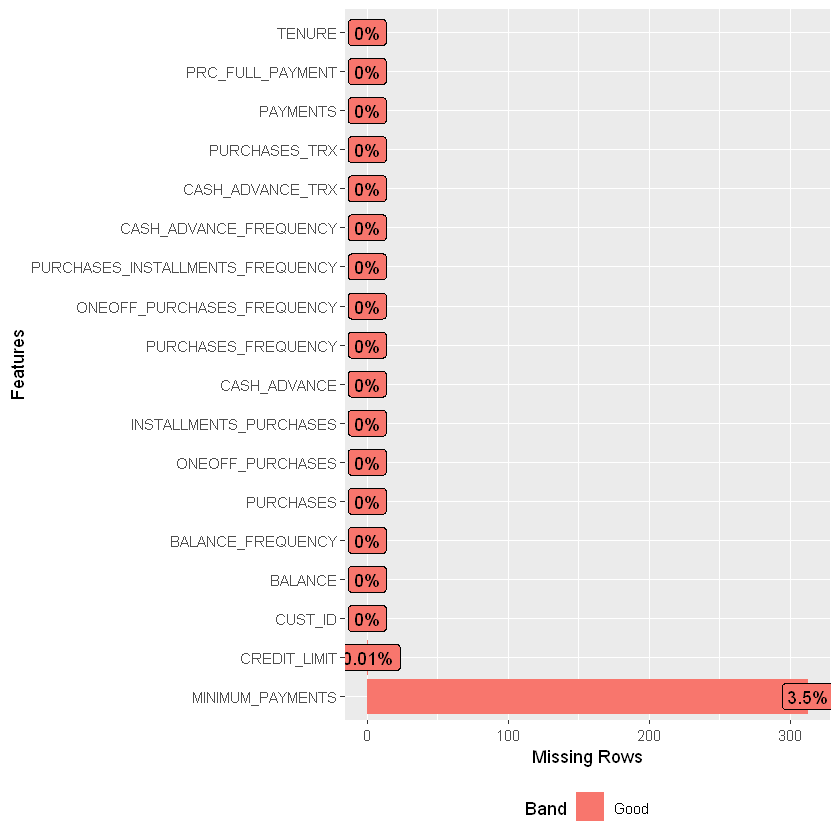

In [118]:
plot_missing(dat)

CREDIT_LIMIT and MINIMUM_PAYMENTS have missing values.

In [119]:
min_payments_ratio <- dat$MINIMUM_PAYMENTS/dat$CREDIT_LIMIT

min_payments_ratio2 <- mean(na.omit(min_payments_ratio))
min_payments_ratio2

[1] 0.2926082

We see that overall the minimum payments is about 30% of the credit limit of a person

#### Histograms

Nearly all variables are skewed and/or have some outliers. Therefore, I will keep them for this analysis.

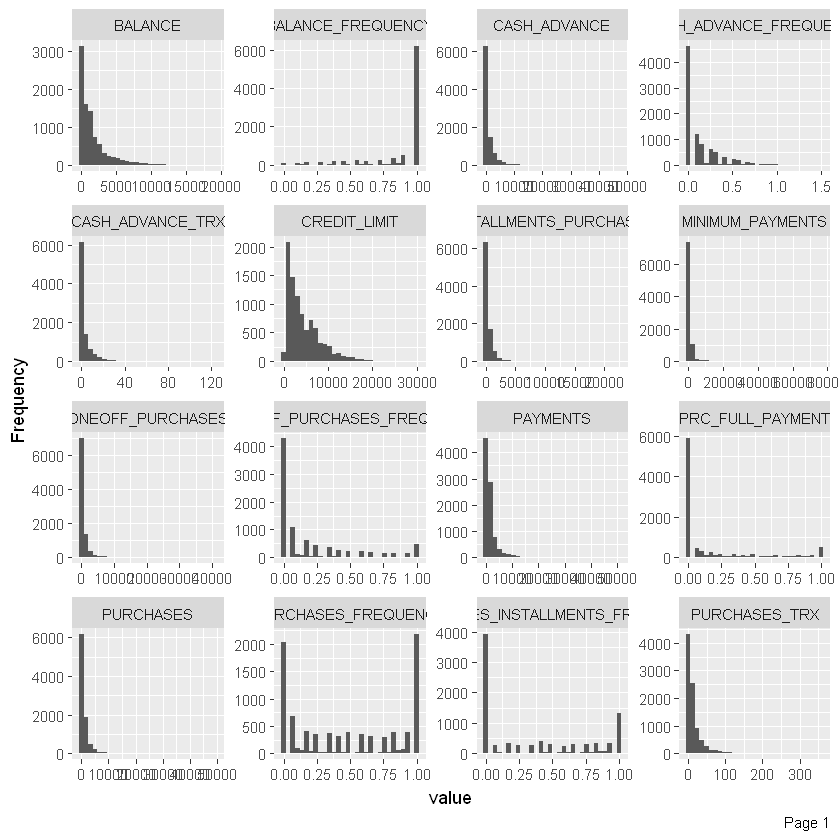

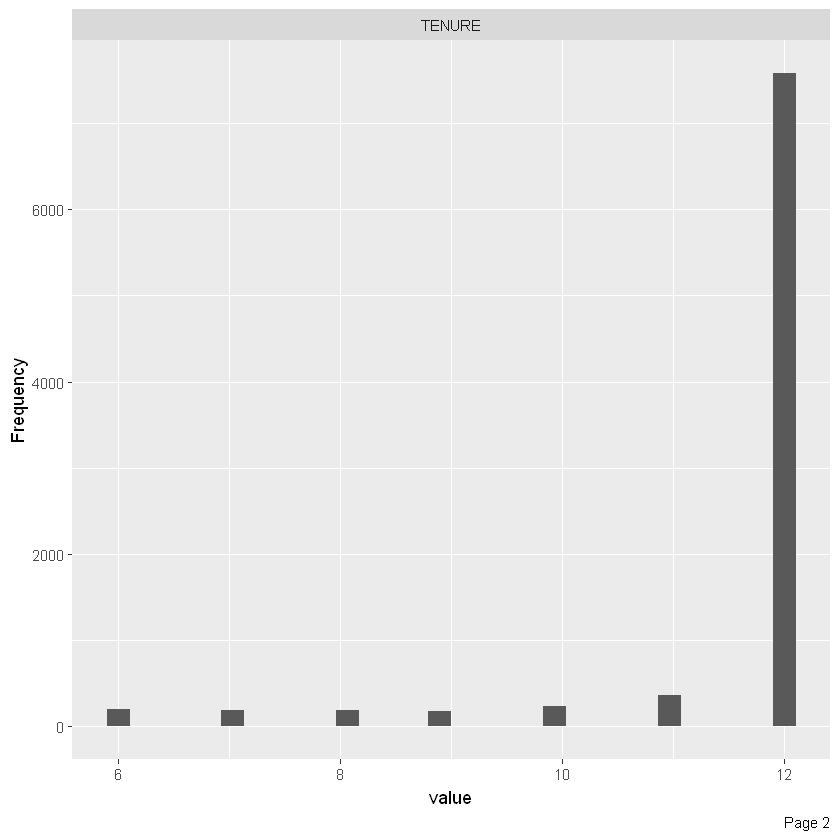

In [120]:
plot_histogram(dat)

### Data Cleaning

I dropped the Credit limit with missing values, and we can estimate and substitute the values for minimum payments using credit limit. I also drop CUST_ID since it´s useless.

In [121]:
dat_clust5 = dat %>% 
  select(-CUST_ID) %>% 
  drop_na(CREDIT_LIMIT) %>%
mutate(MINIMUM_PAYMENTS  = ifelse(is.na(MINIMUM_PAYMENTS),min_payments_ratio2*CREDIT_LIMIT , MINIMUM_PAYMENTS))

In [122]:
dat_clust <- standardize(dat_clust5, centerFun = mean, scaleFun = sd)


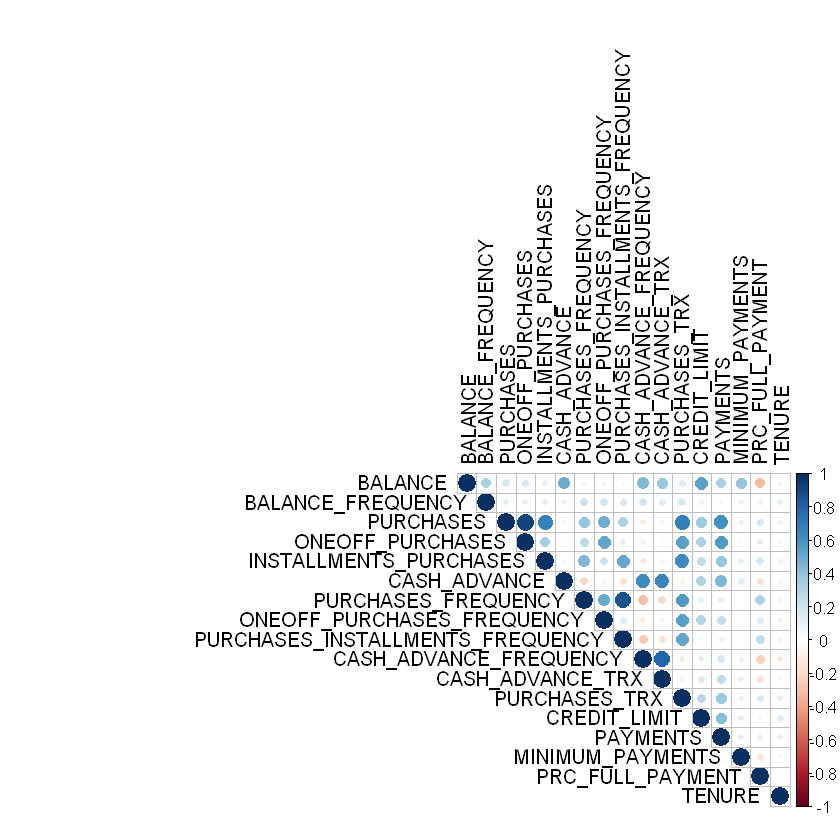

In [123]:
corrplot(cor(dat_clust), type = "upper", 
         tl.col = "black")

### CLUSTERING

#### Hierarchical Clustering

First I try Hierarchical clustering. Since all variables are categorical I use the eucldean distance.

In [124]:
fit_hc_clust = hclust(dist(scale(dat_clust), method = "euclidean"), method = "ward")

The "ward" method has been renamed to "ward.D"; note new "ward.D2"


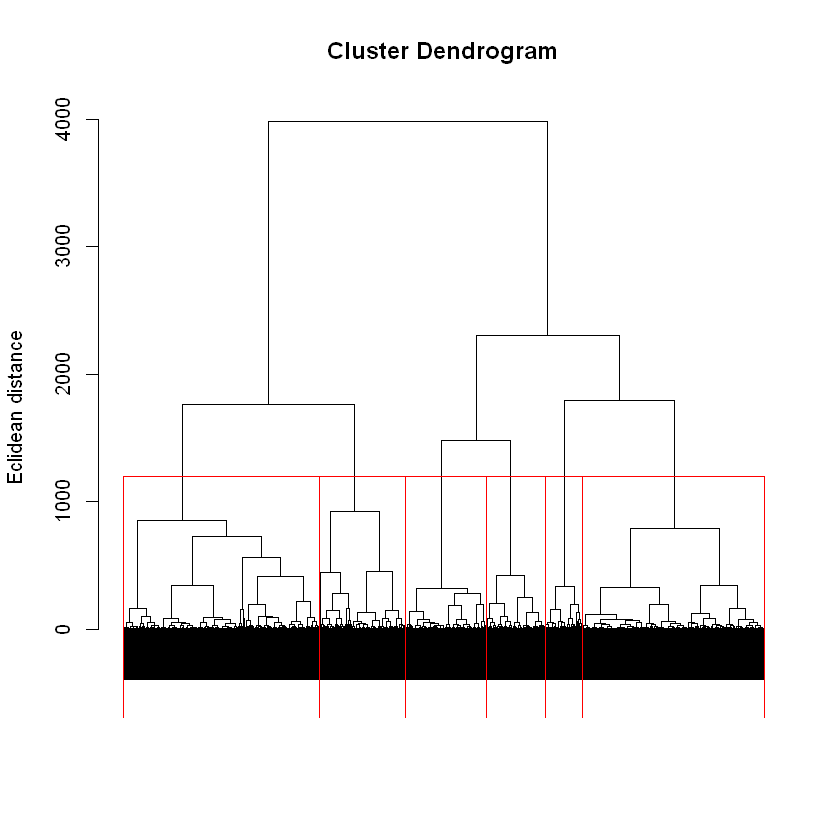

In [125]:
plot(fit_hc_clust, labels = FALSE, sub = "", xlab = "", ylab = "Eclidean distance")
rect.hclust(fit_hc_clust, k = 6)

Regrading the dendrogramm 6 clusters seams to be a good size.

So, I cut the dendrogram for 6 clusters.




In [126]:
hc_cluster = cutree(fit_hc_clust, k = 6)

The PCA plots the data in two-dimensional space. Overall, there are no clear clusters in the data. However, the generated clusters look quite noisy since they are overlapping.

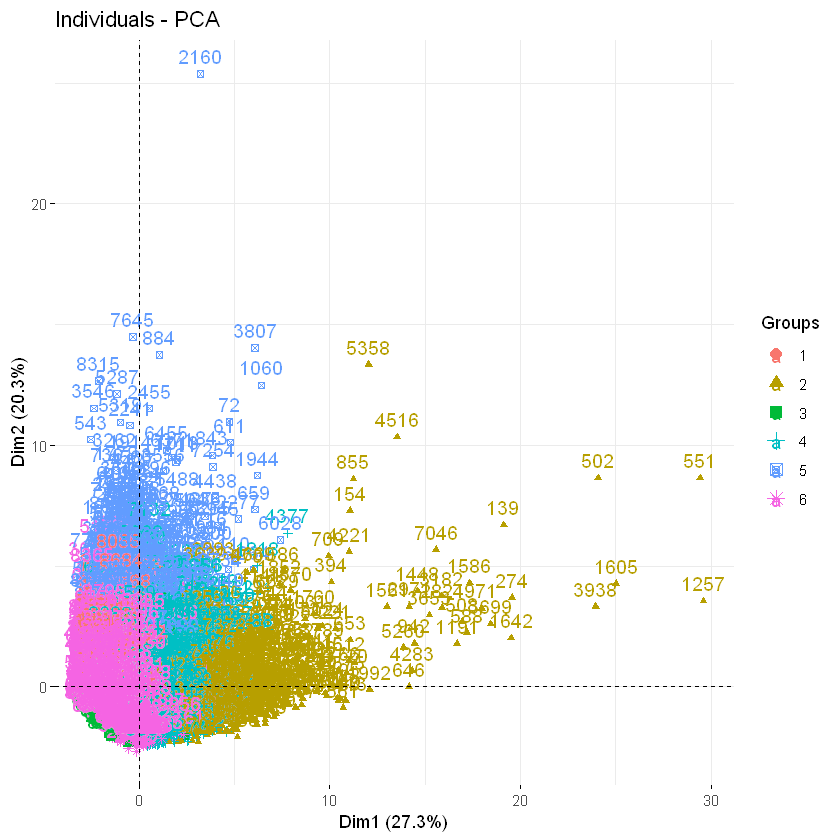

In [127]:
hc_pc = prcomp(scale(dat_clust))

fviz_pca_ind(hc_pc, habillage = hc_cluster)

Let´s take a look at the silhouette plot. It shows if an observation is associated with the right (1) or wrong (-1) cluster. The average silhouette width is quite low. Many observations probably in the wrong clusters.

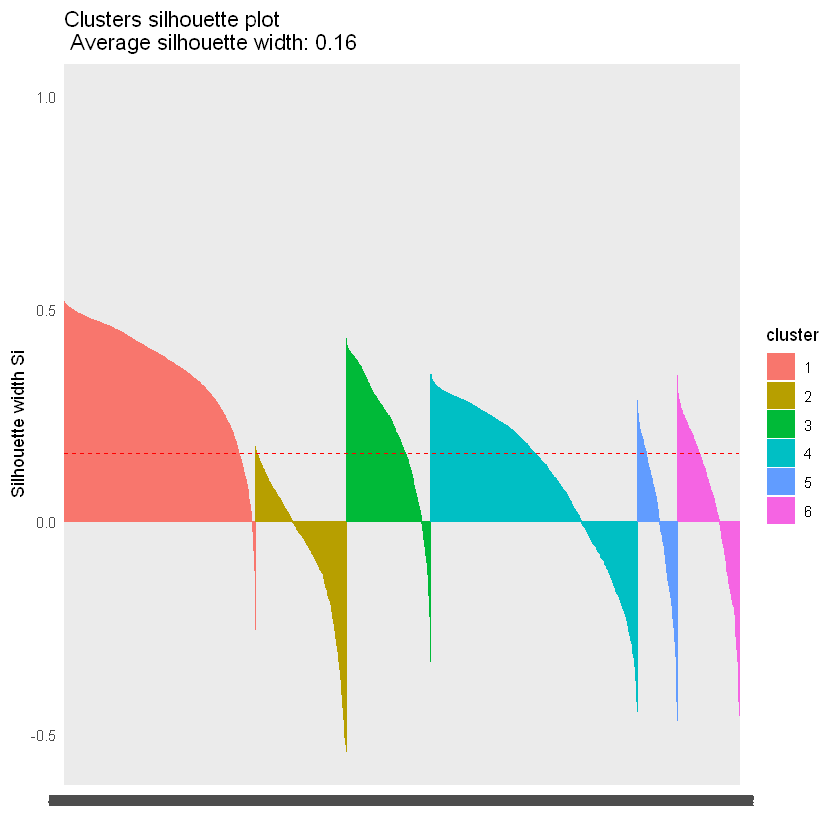

In [128]:
hc_sil = silhouette(hc_cluster, dist(scale(dat_clust), method = "euclidean"), lable = FALSE)

fviz_silhouette(hc_sil, print.summary = FALSE) + theme_minimal()

#### K Means Clustering

Second, we try K-Means. Regarding the wss plot, 4 clusters seem to be a proper number of clusters.

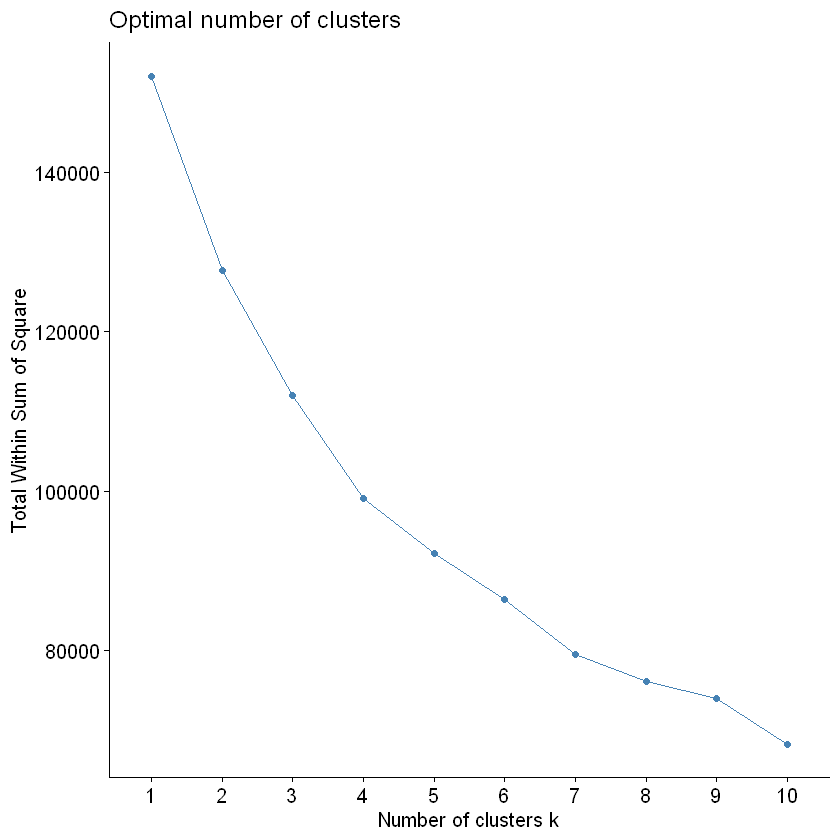

In [129]:
fviz_nbclust(scale(dat_clust), kmeans, method = "wss", k.max = 10,print.summary = TRUE)


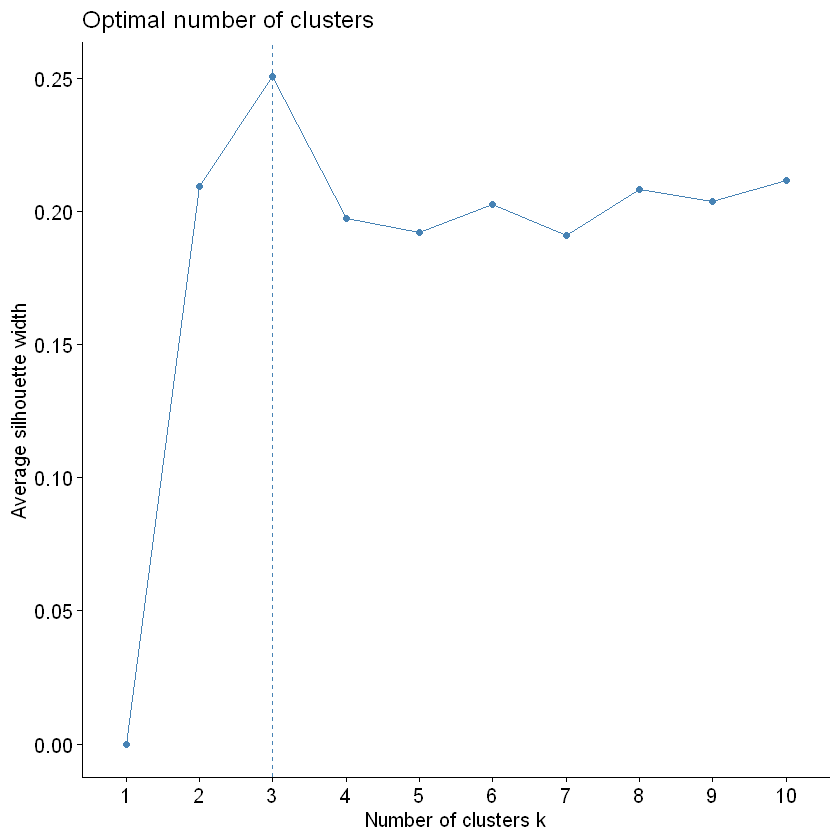

In [130]:
fviz_nbclust(scale(dat_clust), kmeans, method = "silhouette", k.max = 10,print.summary = TRUE)


Which is the optimal value for k? One should choose a number of clusters so that adding another cluster doesn’t give much better partition of the data. At some point the gain will drop, giving an angle in the graph (elbow criterion). The number of clusters is chosen at this point. In our case, it is clear that 3 is the appropriate value for k.

In [131]:
fit_km = kmeans(scale(dat_clust), centers = 3)

In [132]:
# Cluster size
fit_km$size

[1] 6113 1252 1584

Additionally, the kmeans() function returns some ratios that let us know how compact is a cluster and how different are several clusters among themselves.

* betweenss. The between-cluster sum of squares. In an optimal segmentation, one expects this ratio to be as higher as possible, since we would like to have heterogeneous clusters.

* withinss. Vector of within-cluster sum of squares, one component per cluster. In an optimal segmentation, one expects this ratio to be as lower as possible for each cluster,
since we would like to have homogeneity within the clusters.

* tot.withinss. Total within-cluster sum of squares.

* totss. The total sum of squares.

In [133]:
# Between-cluster sum of squares
fit_km$betweenss

[1] 40155.69

In [134]:
# Within-cluster sum of squares
fit_km$withinss

[1] 47993.67 36291.38 27675.25

In [135]:
# Total within-cluster sum of squares 
fit_km$tot.withinss

[1] 111960.3

In [136]:
# Total sum of squares
fit_km$totss

[1] 152116

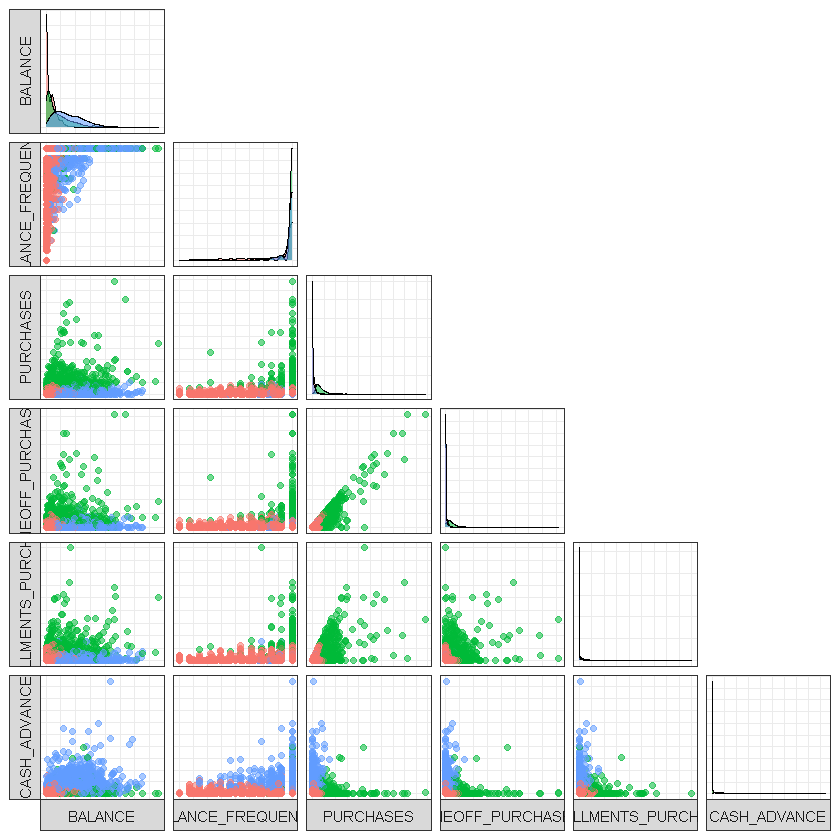

In [137]:
# Clustering 
ggpairs(cbind(dat_clust5, Cluster=as.factor(fit_km$cluster)),
        columns=1:6, aes(colour=Cluster, alpha=0.5),
        lower=list(continuous="points"),
        upper=list(continuous="blank"),
        axisLabels="none", switch="both") +
        theme_bw()

This PCA plot looks better then the plot before.

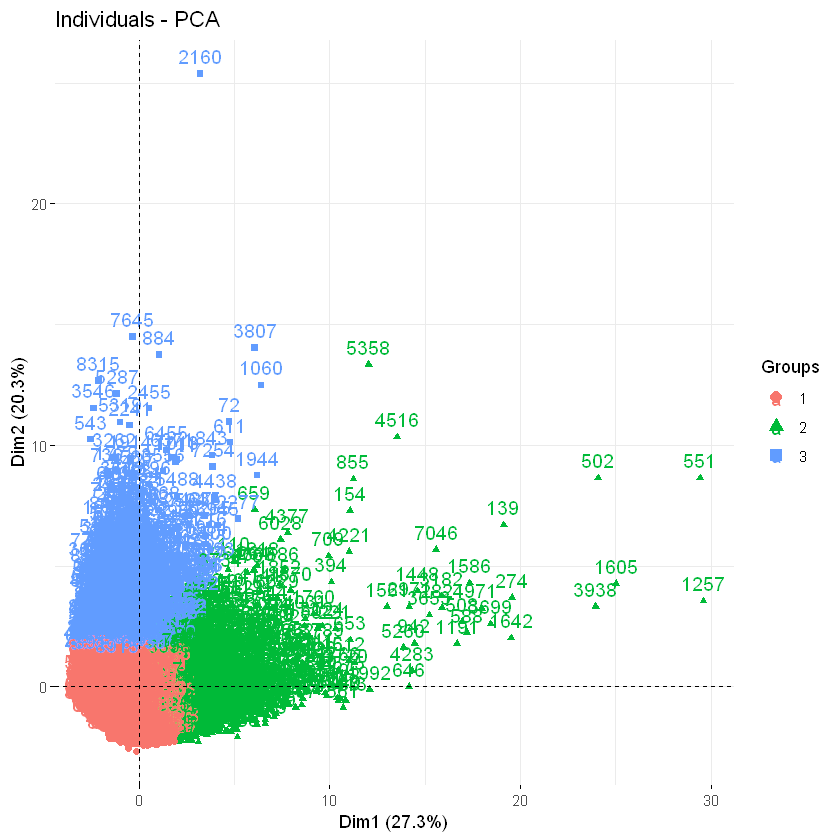

In [138]:
fviz_pca_ind(hc_pc, habillage = fit_km$cluster)

Let´s take a look at this silhouette plot. Overall, the result is better than before. However, especially cluster 1 and 3 have still some observations which are still in the wrong cluster. But it´s the best solution for now which I will use for interpretation.

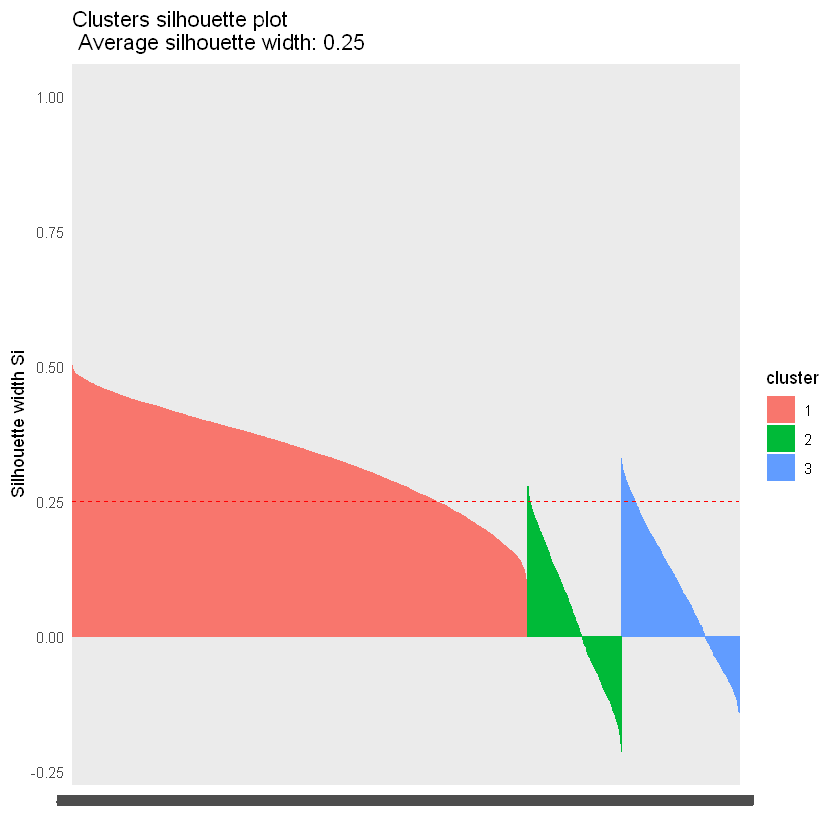

In [139]:
hc_sil = silhouette(fit_km$cluster, dist(scale(dat_clust), method = "euclidean"), lable = FALSE)

fviz_silhouette(hc_sil, print.summary = FALSE) + theme_minimal()

### Interpretation
In order to iterpretate the clusters grouped boxplots will be used.

In [140]:
c = dat_clust5

c$cluster = fit_km$cluster

c_plots = melt(c, id.var = "cluster")

c_plots$cluster = as.factor(c$cluster)

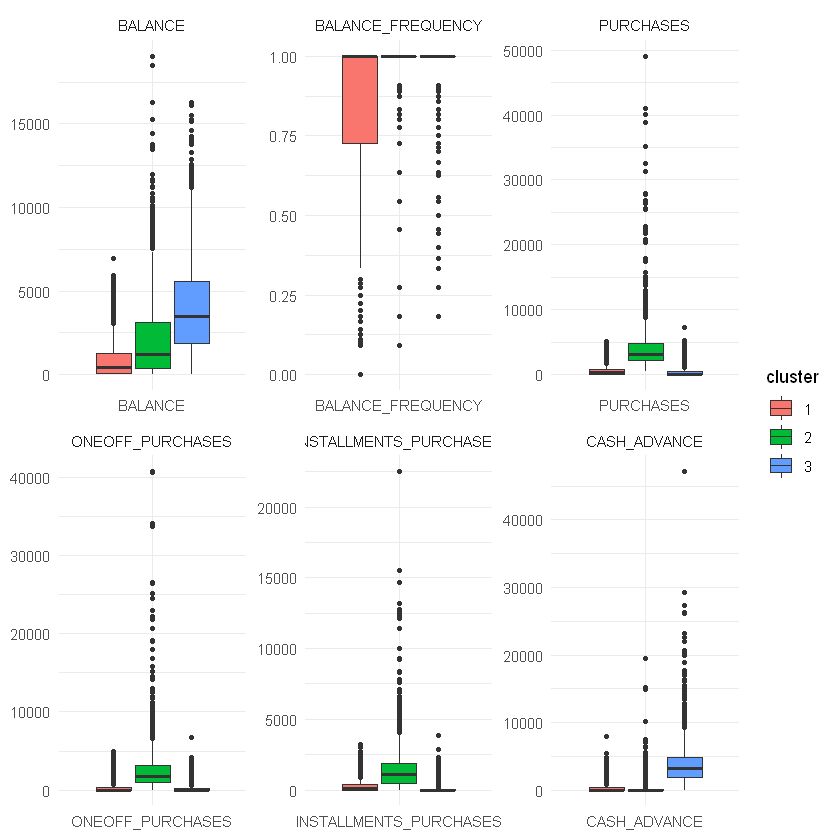

In [141]:
c_plots %>%
  ggplot(aes(x = variable, y = value)) +
  geom_boxplot(aes(fill = cluster), outlier.size = 1) +
  facet_wrap_paginate( ~ variable, scales = "free", ncol = 3, nrow = 2, page = 1) +
  labs(x = NULL, y = NULL) +
  theme_minimal()

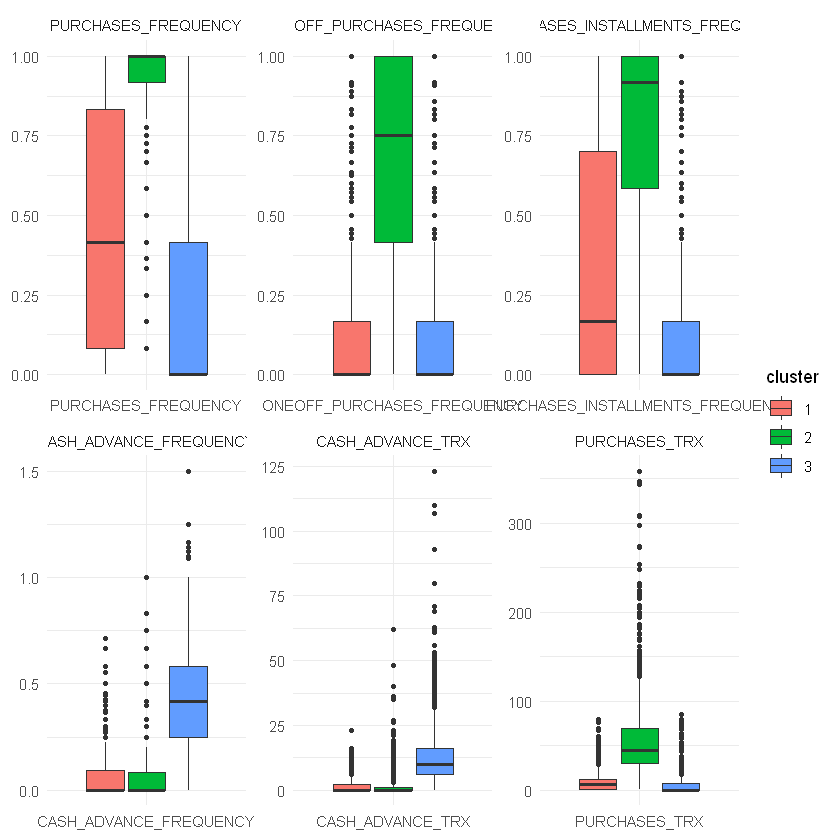

In [142]:
c_plots %>%
  ggplot(aes(x = variable, y = value)) +
  geom_boxplot(aes(fill = cluster), outlier.size = 1) +
  facet_wrap_paginate( ~ variable, scales = "free", ncol = 3, nrow = 2, page = 2) +
  labs(x = NULL, y = NULL) +
  theme_minimal()

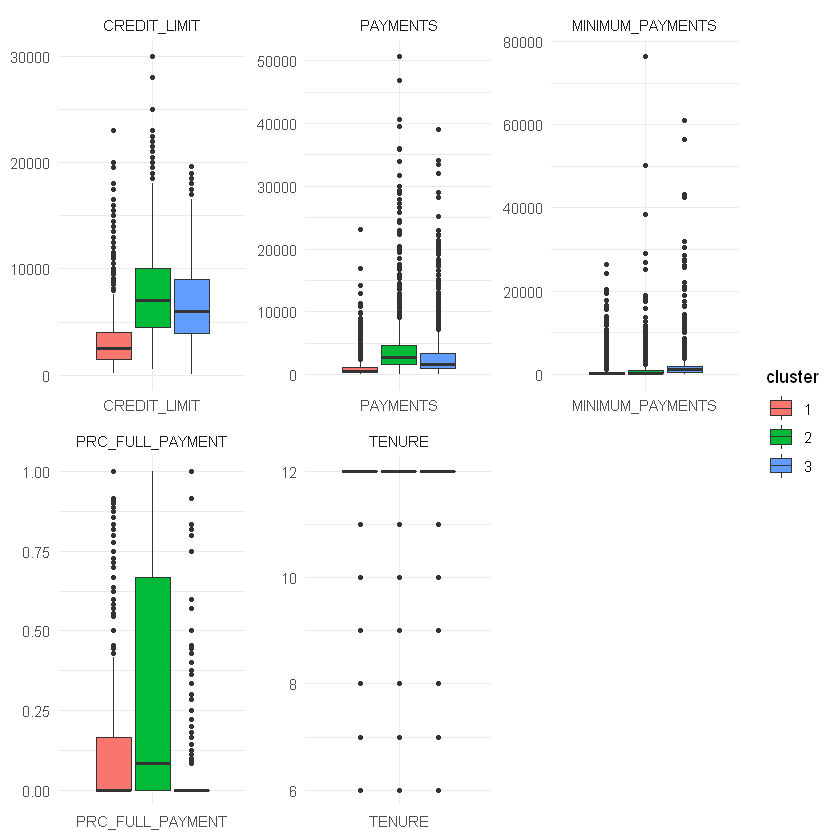

In [143]:
c_plots %>%
  ggplot(aes(x = variable, y = value)) +
  geom_boxplot(aes(fill = cluster), outlier.size = 1) +
  facet_wrap_paginate( ~ variable, scales = "free", ncol = 3, nrow = 2, page = 3) +
  labs(x = NULL, y = NULL) +
  theme_minimal()

The clusters can be interpreted as follows (marketing wise):

* Cluster 1: Frequent user, with (probably) lower income - and hence lower credit limit, that spends his money mostly on consumer goods.
* Cluster 2: Frequent user, with (probably) mid to high income, spend mostly in one-go, and are lured by giving more credit limit.
* Cluster 3: Mid to rare users, with (probably) high income which spends his money more for higher priced products with longterm use, and generally prefer to pay cash in advance.

### Recommendation

As a credit-card lending company, the main target audience should be the group falling in Cluster 2.